<a href="https://colab.research.google.com/github/Carol-ACDR/Atividades-de-Minera-o-de-Dados/blob/main/ATV_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://www.ifpb.edu.br/prpipg/pasta-imagens-da-prpipg/logoifpb.png" alt="Logo IFPB" width="10%">

**INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DA PARAÍBA
CAMPUS CAMPINA GRANDE**

**Curso:** Engenharia de Computação

**Disciplina:** Mineração de Dados

**Semestre:** 2024.2

**Professor:** Igor Barbosa da Costa

**Equipe:** Ana Carolina Dutra Ramos


# EXPLORAÇÃO INICIAL DO DATASET

Tornando a saída deste notebook estável em diferentes execuções:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


np.random.seed(42)

Após baixar os arquivos no site: https://archive.ics.uci.edu/ml/datasets/Wine+Quality e traze-los ao Colab, fazendo upload dos arquivos na pasta de arquivos a direita(ou o código abaixo para fazer upload dinâmico), onde o código támbem se enconta:

In [ ]:
from google.colab import files

# Fazer upload de um ou mais arquivos
uploaded = files.upload()

In [ ]:
# Carregar os dados dos vinhos tinto e branco
wine_red = pd.read_csv('winequality-red.csv', sep=';')
wine_white = pd.read_csv('winequality-white.csv', sep=';')


In [ ]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


As variáveis são medidas físico-químicas dos vinhos, tanto tintos quanto brancos. Variáveis:

* fixed acidity: Acidez fixa do vinho (em g / dm³). Refere-se a ácidos que não evaporam com o aumento da temperatura, como o ácido tartárico.

* volatile acidity: Acidez volátil (em g / dm³). Está relacionada com o ácido acético, que pode se evaporar com o aumento da temperatura e está frequentemente associado ao vinagre.

* citric acid: Ácido cítrico (em g / dm³). É um componente que pode dar um sabor fresco ao vinho, e é comum em vinhos brancos.

* residual sugar: Açúcar residual (em g / dm³). Refere-se ao açúcar que permanece no vinho após a fermentação.

* chlorides: Cloretos (em g / dm³). Relacionados à quantidade de sal, podem indicar o nível de salinidade do vinho.

* free sulfur dioxide: Dióxido de enxofre livre (em mg / L). É um conservante usado para proteger o vinho contra bactérias e oxidação.

* total sulfur dioxide: Dióxido de enxofre total (em mg / L). (Tanto o dióxido de enxofre livre quanto o ligado ao vinho).

* density: Densidade (em g/cm³). Densidade do vinho que está relacionada à concentração de açúcares, álcool e outras substâncias.

* pH: pH. Mede a acidez ou alcalinidade do vinho. Valores mais baixos indicam maior acidez(0 a 14).

* sulphates: Sulfatos (em g / dm³). Compostos relacionados ao sabor e estabilidade do vinho.

* alcohol: Teor alcoólico (em %). A concentração de etanol no vinho.

* quality : Nota atribuída ao vinho, variando de 3 a 9.
Para simplificar o problema, transformaremos a variável quality em binária:
• Qualidade alta: quality >= 7 → Classe 1
• Qualidade baixa: quality < 7 → Classe 0

In [ ]:
# Verificar o número de linhas e colunas
wine_red.shape


(1599, 12)

In [ ]:
wine_white.shape

(4898, 12)

In [ ]:
# Verificar os tipos de dados de cada coluna
wine_red.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
wine_white.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
# Verificar se há valores ausentes
wine_red.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine_white.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Estatísticas descritivas das variáveis numéricas
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Definição de tamanhos de fonte padrão para criar figuras visualmente agradáveis:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Observação da distribuição inicial das variaveis relacionadas a variavel alvo ( Vinho Vermelho)

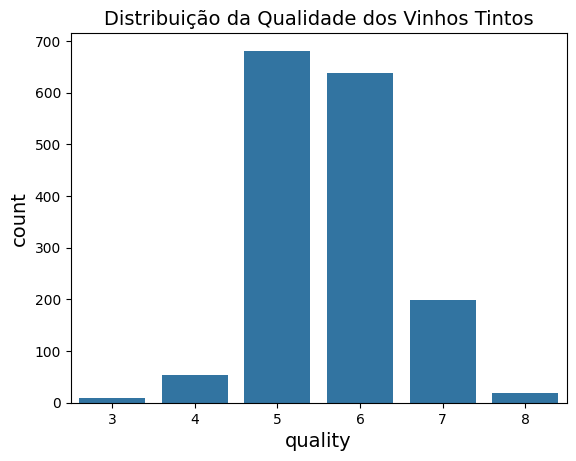

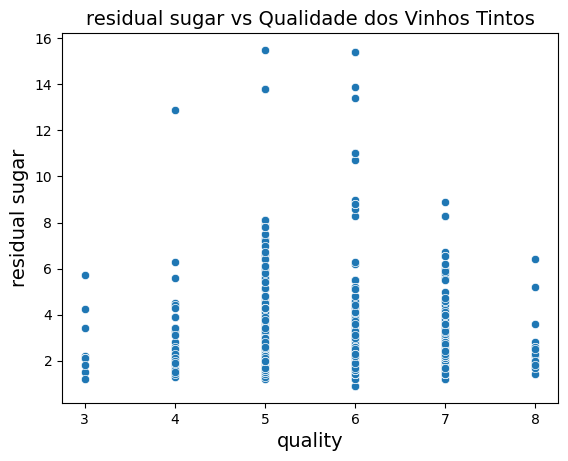

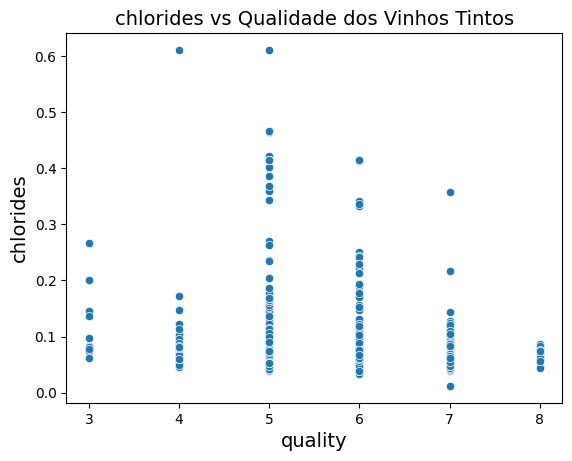

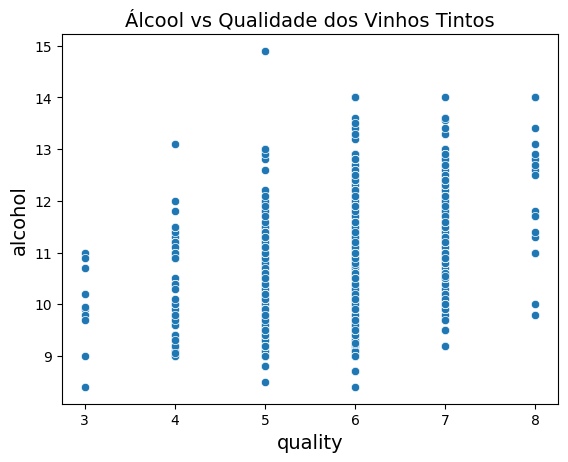

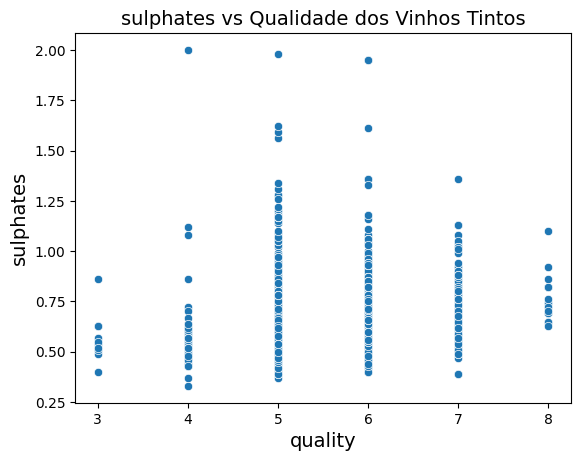

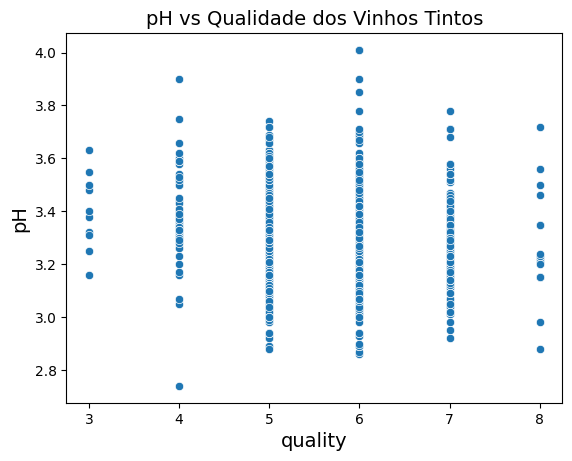

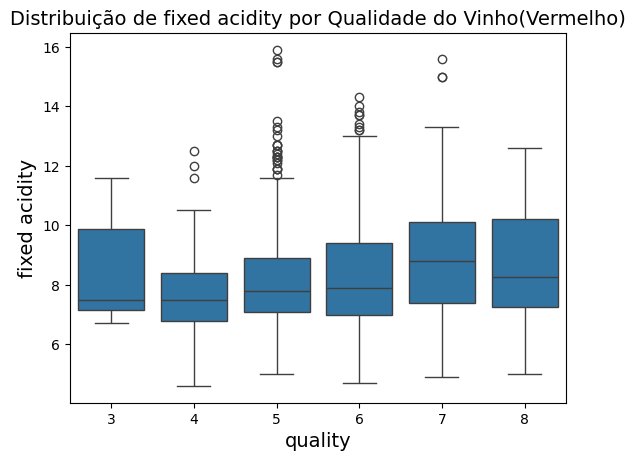

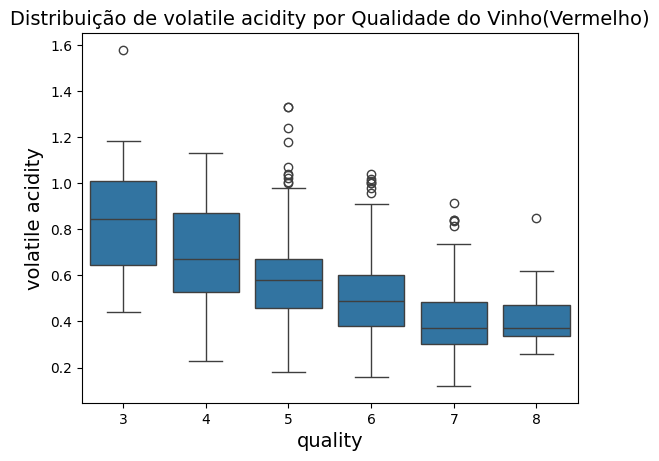

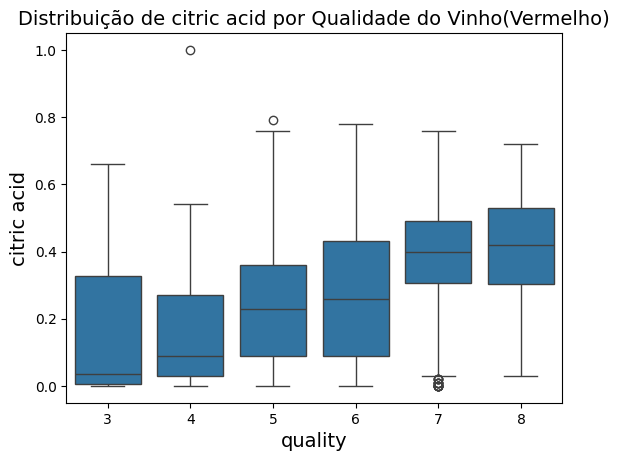

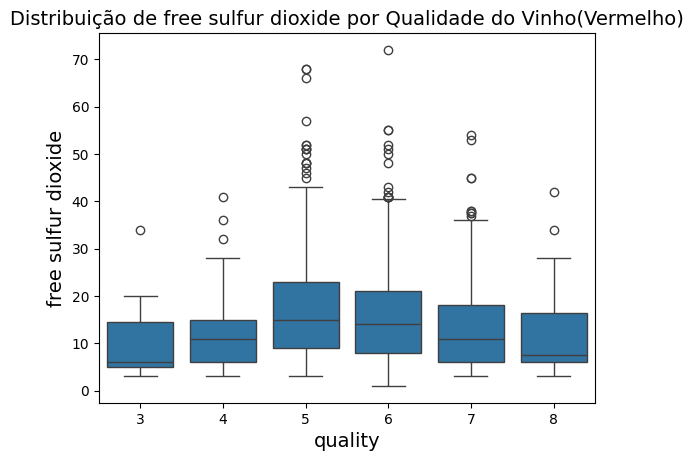

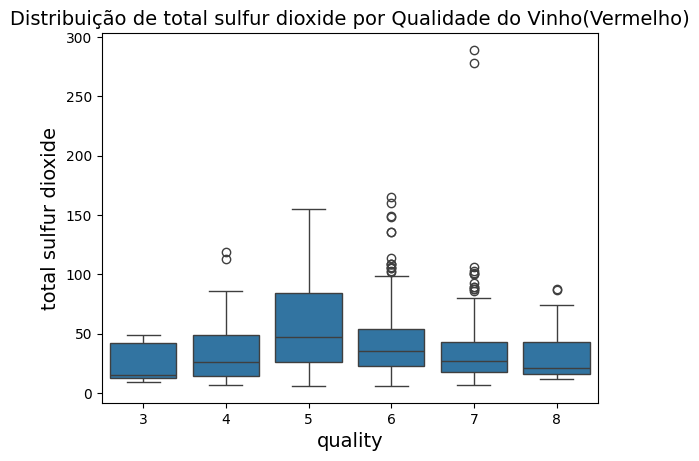

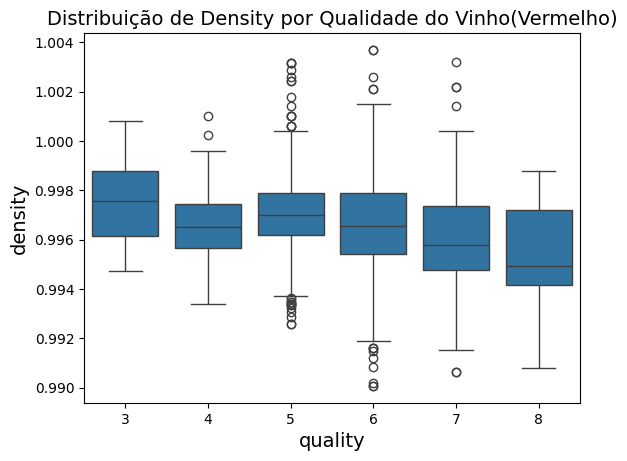

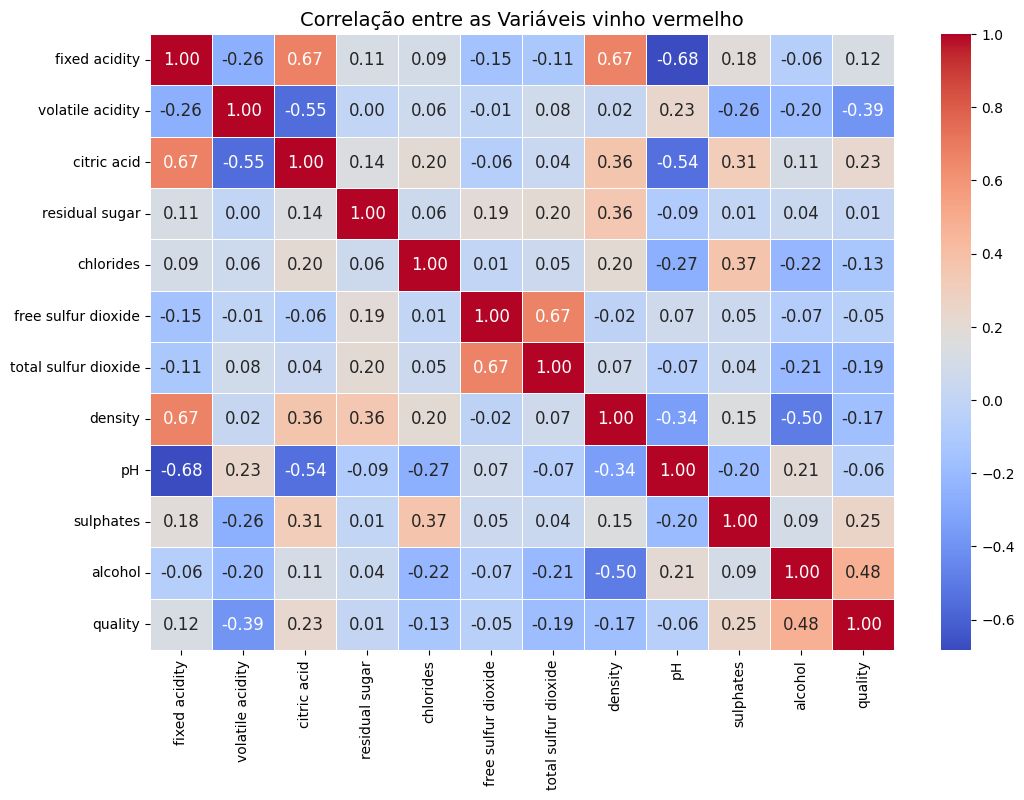

In [ ]:
# Gráfico de distribuição da qualidade (nota)
sns.countplot(x='quality', data=wine_red)
plt.title('Distribuição da Qualidade dos Vinhos Tintos')
plt.show()

#scatterplot vinho vermelho

sns.scatterplot(x='quality', y='residual sugar', data=wine_red)
plt.title('residual sugar vs Qualidade dos Vinhos Tintos')
plt.show()

sns.scatterplot(x='quality', y='chlorides', data=wine_red)
plt.title('chlorides vs Qualidade dos Vinhos Tintos')
plt.show()

sns.scatterplot(x='quality', y='alcohol', data=wine_red)
plt.title('Álcool vs Qualidade dos Vinhos Tintos')
plt.show()

sns.scatterplot(x='quality', y='sulphates', data=wine_red)
plt.title('sulphates vs Qualidade dos Vinhos Tintos')
plt.show()

sns.scatterplot(x='quality', y='pH', data=wine_red)
plt.title('pH vs Qualidade dos Vinhos Tintos')
plt.show()

# Boxplot para comparar variaveis entre vinhos de qualidade alta e baixa

sns.boxplot(x='quality', y='fixed acidity', data=wine_red)
plt.title('Distribuição de fixed acidity por Qualidade do Vinho(Vermelho)')
plt.show()

sns.boxplot(x='quality', y='volatile acidity', data=wine_red)
plt.title('Distribuição de volatile acidity por Qualidade do Vinho(Vermelho)')
plt.show()

sns.boxplot(x='quality', y='citric acid', data=wine_red)
plt.title('Distribuição de citric acid por Qualidade do Vinho(Vermelho)')
plt.show()

sns.boxplot(x='quality', y='free sulfur dioxide', data=wine_red)
plt.title('Distribuição de free sulfur dioxide por Qualidade do Vinho(Vermelho)')
plt.show()

sns.boxplot(x='quality', y='total sulfur dioxide', data=wine_red)
plt.title('Distribuição de total sulfur dioxide por Qualidade do Vinho(Vermelho)')
plt.show()

sns.boxplot(x='quality', y='density', data=wine_red)
plt.title('Distribuição de Density por Qualidade do Vinho(Vermelho)')
plt.show()


# Mapa de correlação Vinho vermelho
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = wine_red.corr()

# Plotar o mapa de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as Variáveis vinho vermelho')
plt.show()


Observação da distribuição inicial das variaveis relacionadas a variavel alvo ( Vinho Branco)

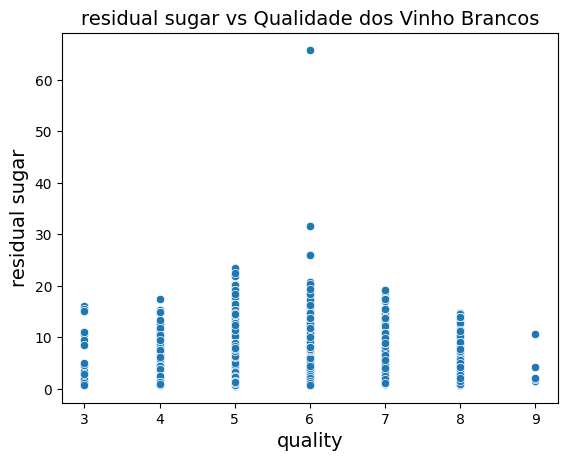

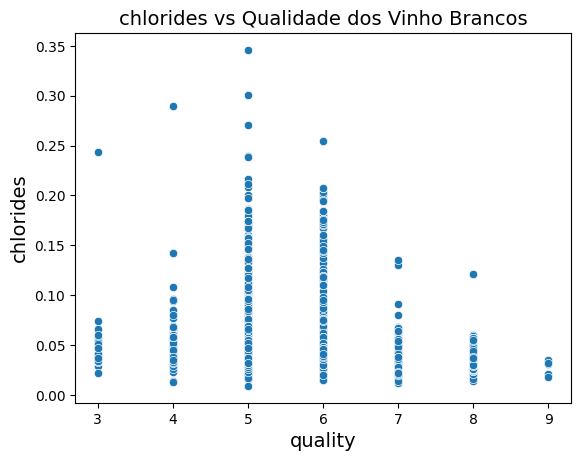

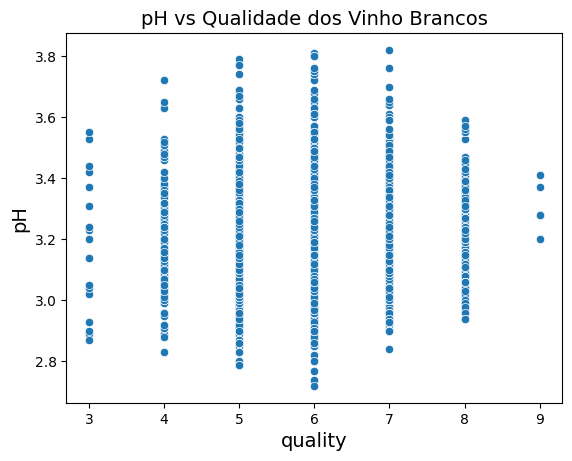

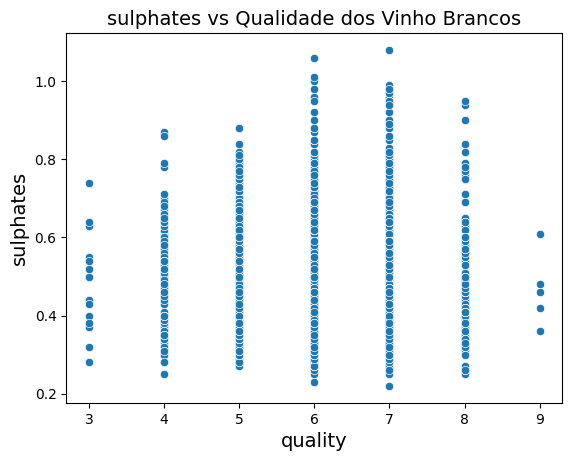

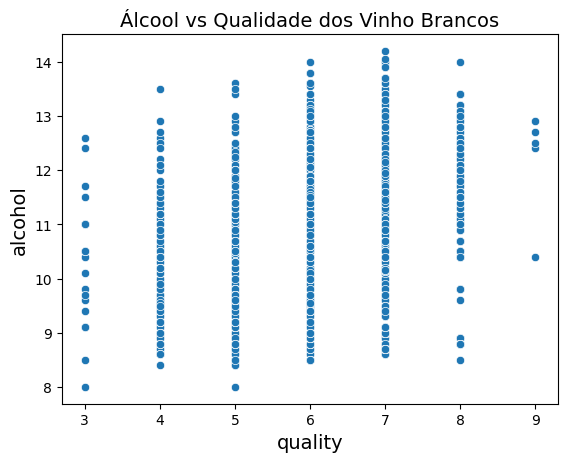

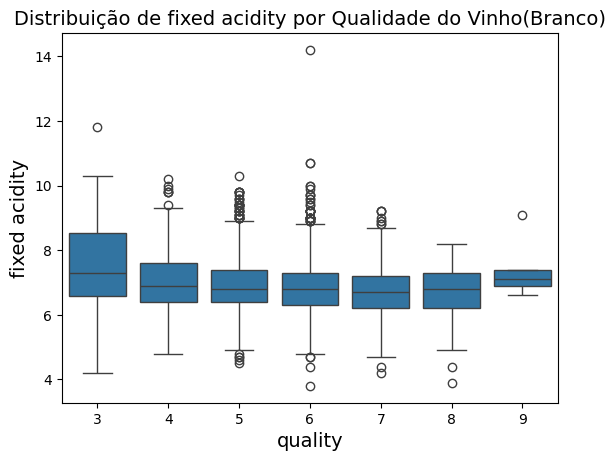

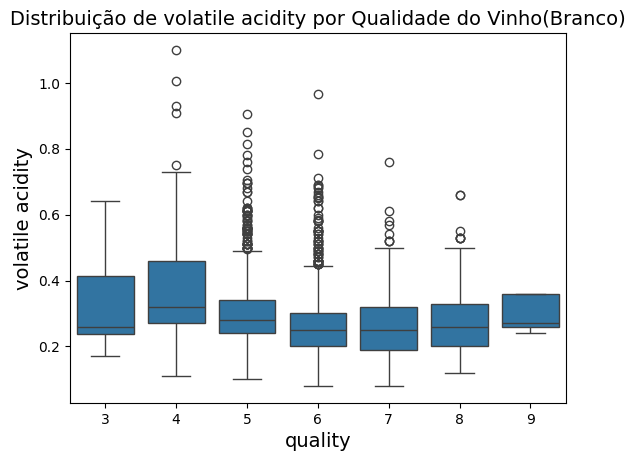

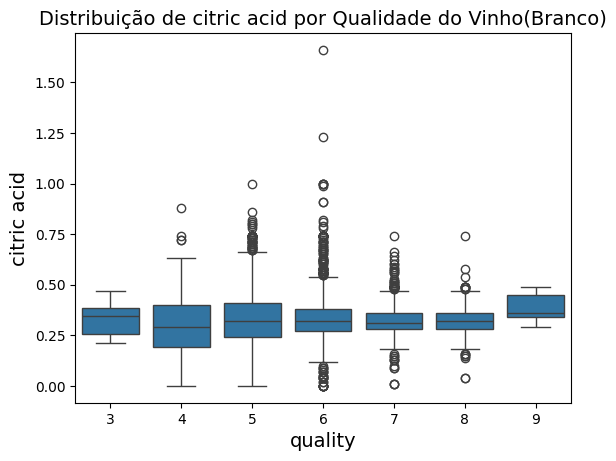

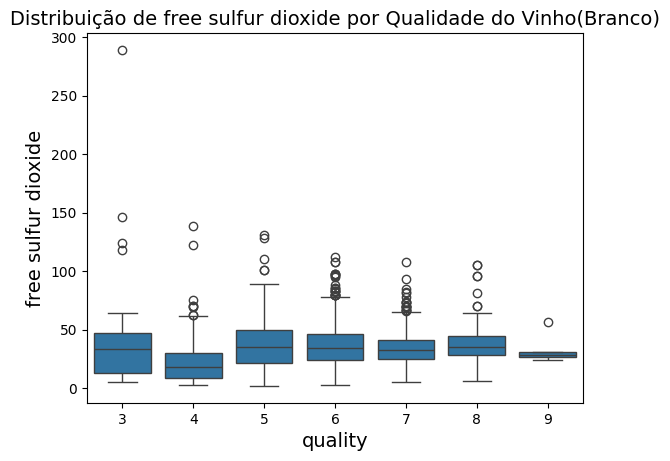

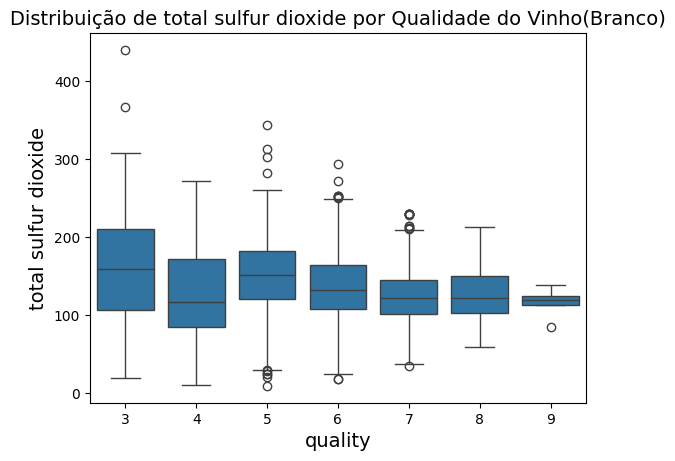

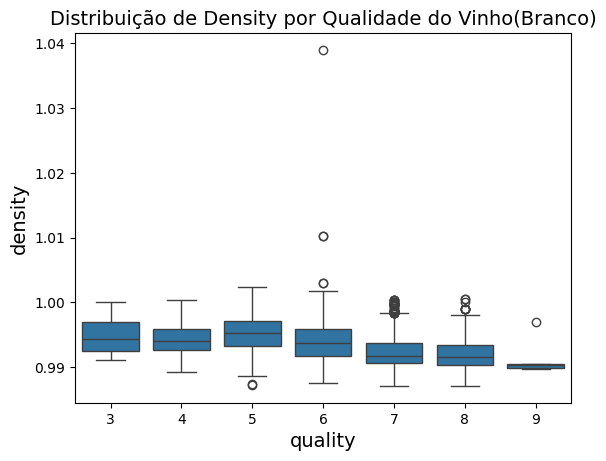

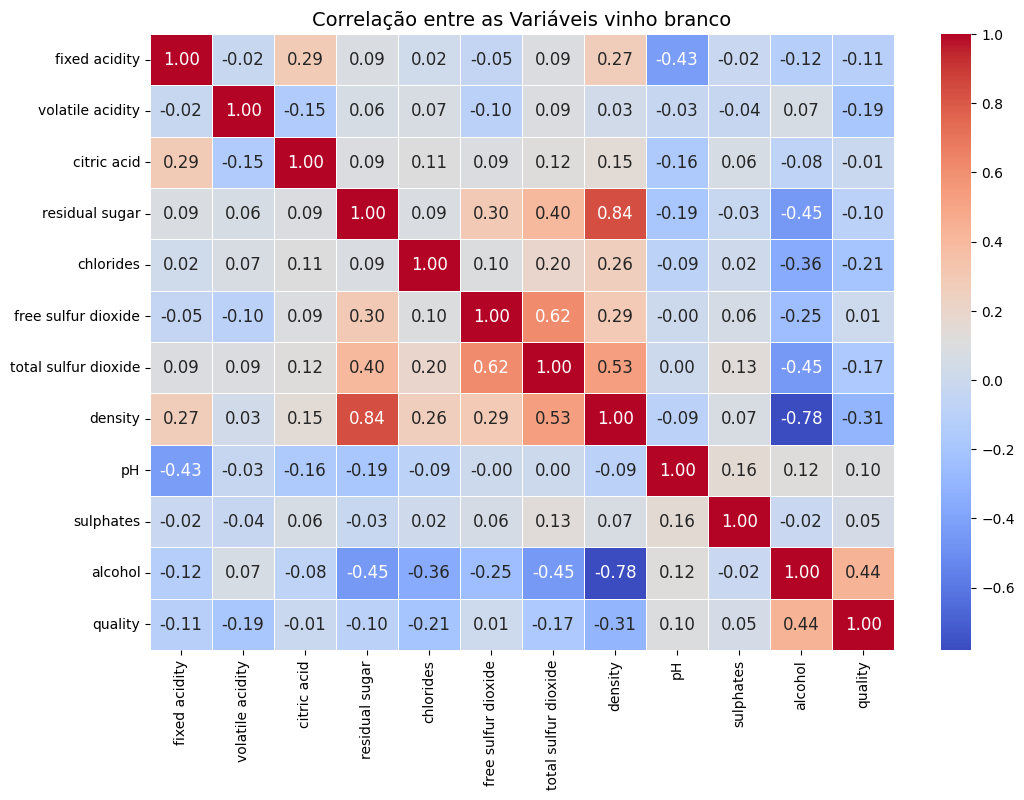

In [ ]:

#scatterplot vinho branco

sns.scatterplot(x='quality', y='residual sugar', data=wine_white)
plt.title('residual sugar vs Qualidade dos Vinho Brancos')
plt.show()

sns.scatterplot(x='quality', y='chlorides', data=wine_white)
plt.title('chlorides vs Qualidade dos Vinho Brancos')
plt.show()

sns.scatterplot(x='quality', y='pH', data=wine_white)
plt.title('pH vs Qualidade dos Vinho Brancos')
plt.show()

sns.scatterplot(x='quality', y='sulphates', data=wine_white)
plt.title('sulphates vs Qualidade dos Vinho Brancos')
plt.show()

sns.scatterplot(x='quality', y='alcohol', data=wine_white)
plt.title('Álcool vs Qualidade dos Vinho Brancos')
plt.show()


# Boxplot para comparar variaveis entre vinhos de qualidade alta e baixa

sns.boxplot(x='quality', y='fixed acidity', data=wine_white)
plt.title('Distribuição de fixed acidity por Qualidade do Vinho(Branco)')
plt.show()

sns.boxplot(x='quality', y='volatile acidity', data=wine_white)
plt.title('Distribuição de volatile acidity por Qualidade do Vinho(Branco)')
plt.show()

sns.boxplot(x='quality', y='citric acid', data=wine_white)
plt.title('Distribuição de citric acid por Qualidade do Vinho(Branco)')
plt.show()


sns.boxplot(x='quality', y='free sulfur dioxide', data=wine_white)
plt.title('Distribuição de free sulfur dioxide por Qualidade do Vinho(Branco)')
plt.show()

sns.boxplot(x='quality', y='total sulfur dioxide', data=wine_white)
plt.title('Distribuição de total sulfur dioxide por Qualidade do Vinho(Branco)')
plt.show()

sns.boxplot(x='quality', y='density', data=wine_white)
plt.title('Distribuição de Density por Qualidade do Vinho(Branco)')
plt.show()

# Mapa de correlação Vinho branco
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = wine_white.corr()

# Plotar o mapa de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as Variáveis vinho branco')
plt.show()

# LIMPEZA E PRÉ-PROCESSAMENTO

Primeiramente, para melhorar as predições, juntaremos os dois datasets, de forma a acrecentar colunas que separem os vinhos por seus tipos: "RED" para o vinho vermelho e "WHITE" para o branco, 1 representa que o tipo de vinho a qual pertence, 0 significa que não pertence a aquele tipo de vinho.

In [ ]:
wine_red['RED'] = 1
wine_red['WHITE'] = 0
wine_white['RED'] = 0
wine_white['WHITE'] = 1
wine = pd.concat([wine_red, wine_white], axis=0, ignore_index=True)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,RED,WHITE
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [ ]:
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,RED,WHITE
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


Converção das colunas quality em uma variável binária (0 ou 1).

In [ ]:

wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [ ]:
wine['quality']

,quality
0,0
1,0
2,0
3,0
4,0
...,...
6492,0
6493,0
6494,0
6495,1


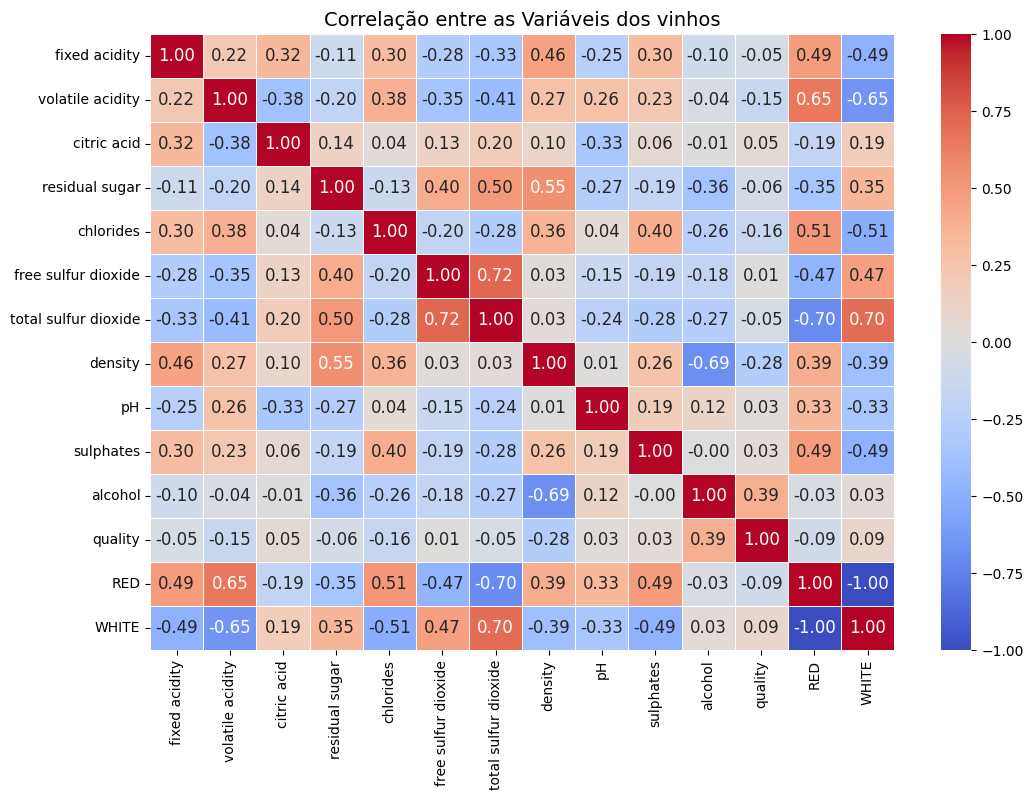

In [ ]:
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = wine.corr()

# Plotar o mapa de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as Variáveis dos vinhos')
plt.show()

Agora, vamos normalizar as variaveis continuas e separar a variável alvo:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar os dados de vinhos tintos e brancos
X_wine = wine.drop(['quality'], axis=1)

X_wine_scaled = scaler.fit_transform(X_wine)

# Variável alvo
y_wine = wine['quality']


# Divisão do Dataset

Abaixo está a divisão

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão do dataset em treino e teste (80/20)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=42)


# Seleção de Modelos e Treinamento + Avaliação de Modelos

Abaixo vamos utilizar os três modelos: Regressão Linear, Árvore de Decisão e Random Forest. Fazer os calculos das métricas e e calcular a matriz de confusão, para comparações.

Começando pelo linear regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, KFold

# Inicializar o modelo de Regressão Logística
log_reg = LogisticRegression()

# Usando cross-validation com KFold (por exemplo, 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizando a validação cruzada (apenas com o conjunto de treino)
scores = cross_validate(log_reg, X_wine_train, y_wine_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

# Exibindo as métricas médias de cada fold
print(f"Acurácia (validação cruzada): {np.mean(scores['test_accuracy']):.4f}")
print(f"Precisão (validação cruzada): {np.mean(scores['test_precision']):.4f}")
print(f"Revocação (validação cruzada): {np.mean(scores['test_recall']):.4f}")
print(f"F1-Score (validação cruzada): {np.mean(scores['test_f1']):.4f}")

# Predição no conjunto de teste para avaliação final
y_wine_pred = log_reg.fit(X_wine_train, y_wine_train).predict(X_wine_test)

# Calculando as métricas de desempenho no conjunto de teste
accuracy = accuracy_score(y_wine_test, y_wine_pred)
precision = precision_score(y_wine_test, y_wine_pred)
recall = recall_score(y_wine_test, y_wine_pred)
f1 = f1_score(y_wine_test, y_wine_pred)

# Exibindo as métricas de desempenho no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Matriz de Confusão e Relatório de Classificação
print('\nMatriz de Confusão:')
print(confusion_matrix(y_wine_test, y_wine_pred))
print('Relatório de Classificação:')
print(classification_report(y_wine_test, y_wine_pred))



Acurácia (validação cruzada): 0.8122
Precisão (validação cruzada): 0.5490
Revocação (validação cruzada): 0.2658
F1-Score (validação cruzada): 0.3580

Métricas no conjunto de teste:
Acurácia: 0.8292
Precisão: 0.6364
Revocação: 0.2778
F1-Score: 0.3867

Matriz de Confusão:
[[1008   40]
 [ 182   70]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1048
           1       0.64      0.28      0.39       252

    accuracy                           0.83      1300
   macro avg       0.74      0.62      0.64      1300
weighted avg       0.81      0.83      0.80      1300



Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Usando cross-validation com KFold (por exemplo, 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizando a validação cruzada (apenas com o conjunto de treino)
scores_rf = cross_validate(rf, X_wine_train, y_wine_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

# Exibindo as métricas médias de cada fold
print(f"Acurácia (validação cruzada): {np.mean(scores_rf['test_accuracy']):.4f}")
print(f"Precisão (validação cruzada): {np.mean(scores_rf['test_precision']):.4f}")
print(f"Revocação (validação cruzada): {np.mean(scores_rf['test_recall']):.4f}")
print(f"F1-Score (validação cruzada): {np.mean(scores_rf['test_f1']):.4f}")

# Após a validação cruzada, treinar o modelo no conjunto completo de treino (usando todos os dados de treino)
rf.fit(X_wine_train, y_wine_train)

# Predição no conjunto de teste para avaliação final
y_wine_pred_rf = rf.predict(X_wine_test)

# Calculando as métricas de desempenho no conjunto de teste
accuracy_rf = accuracy_score(y_wine_test, y_wine_pred_rf)
precision_rf = precision_score(y_wine_test, y_wine_pred_rf)
recall_rf = recall_score(y_wine_test, y_wine_pred_rf)
f1_rf = f1_score(y_wine_test, y_wine_pred_rf)

# Exibindo as métricas de desempenho no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia Random Forest: {accuracy_rf:.4f}")
print(f"Precisão Random Forest: {precision_rf:.4f}")
print(f"Revocação Random Forest: {recall_rf:.4f}")
print(f"F1-Score Random Forest: {f1_rf:.4f}")

# Matriz de Confusão e Relatório de Classificação
print('\nMatriz de Confusão:')
print(confusion_matrix(y_wine_test, y_wine_pred_rf))
print('Relatório de Classificação:')
print(classification_report(y_wine_test, y_wine_pred_rf))



Acurácia (validação cruzada): 0.8769
Precisão (validação cruzada): 0.7863
Revocação (validação cruzada): 0.5138
F1-Score (validação cruzada): 0.6205

Métricas no conjunto de teste:
Acurácia Random Forest: 0.8892
Precisão Random Forest: 0.8068
Revocação Random Forest: 0.5635
F1-Score Random Forest: 0.6636

Matriz de Confusão:
[[1014   34]
 [ 110  142]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.56      0.66       252

    accuracy                           0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVC

# Inicializar o modelo SVM
svm = SVC(random_state=42, probability=True)

# Usando cross-validation com KFold (por exemplo, 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizando a validação cruzada (apenas com o conjunto de treino)
scores_svm = cross_validate(svm, X_wine_train, y_wine_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False)

# Exibindo as métricas médias de cada fold
print(f"Acurácia (validação cruzada): {np.mean(scores_svm['test_accuracy']):.4f}")
print(f"Precisão (validação cruzada): {np.mean(scores_svm['test_precision']):.4f}")
print(f"Revocação (validação cruzada): {np.mean(scores_svm['test_recall']):.4f}")
print(f"F1-Score (validação cruzada): {np.mean(scores_svm['test_f1']):.4f}")

# Após a validação cruzada, treinar o modelo no conjunto completo de treino (usando todos os dados de treino)
svm.fit(X_wine_train, y_wine_train)

# Predição no conjunto de teste para avaliação final
y_wine_pred_svm = svm.predict(X_wine_test)

# Calculando as métricas de desempenho no conjunto de teste
accuracy_svm = accuracy_score(y_wine_test, y_wine_pred_svm)
precision_svm = precision_score(y_wine_test, y_wine_pred_svm)
recall_svm = recall_score(y_wine_test, y_wine_pred_svm)
f1_svm = f1_score(y_wine_test, y_wine_pred_svm)

# Exibindo as métricas de desempenho no conjunto de teste
print("\nMétricas no conjunto de teste:")
print(f"Acurácia SVM: {accuracy_svm:.4f}")
print(f"Precisão SVM: {precision_svm:.4f}")
print(f"Revocação SVM: {recall_svm:.4f}")
print(f"F1-Score SVM: {f1_svm:.4f}")

# Matriz de Confusão e Relatório de Classificação
print('\nMatriz de Confusão:')
print(confusion_matrix(y_wine_test, y_wine_pred_svm))
print('Relatório de Classificação:')
print(classification_report(y_wine_test, y_wine_pred_svm))



Acurácia (validação cruzada): 0.8305
Precisão (validação cruzada): 0.6780
Revocação (validação cruzada): 0.2760
F1-Score (validação cruzada): 0.3916

Métricas no conjunto de teste:
Acurácia SVM: 0.8369
Precisão SVM: 0.7128
Revocação SVM: 0.2659
F1-Score SVM: 0.3873

Matriz de Confusão:
[[1021   27]
 [ 185   67]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1048
           1       0.71      0.27      0.39       252

    accuracy                           0.84      1300
   macro avg       0.78      0.62      0.65      1300
weighted avg       0.82      0.84      0.81      1300



Curva ROC-AUC

Para comparar os modelos, vamos utilizar a curva ROC-AUC.

Primeiro, com vinho vermelho

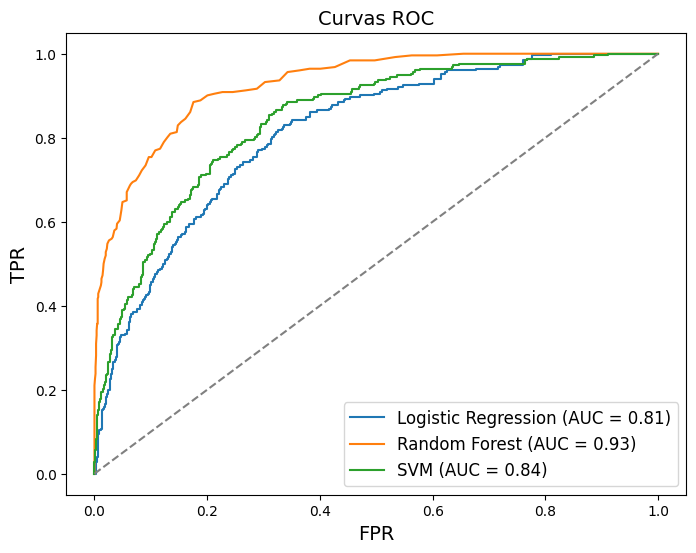

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular a AUC para os três modelos
y_wine_prob_log_reg = log_reg.predict_proba(X_wine_test)[:,1]
y_wine_prob_rf = rf.predict_proba(X_wine_test)[:,1]
y_wine_prob_svm = svm.predict_proba(X_wine_test)[:,1]

# Curva ROC
fpr_log_reg_r, tpr_log_reg_r, _ = roc_curve(y_wine_test, y_wine_prob_log_reg)
fpr_rf_r, tpr_rf_r, _ = roc_curve(y_wine_test, y_wine_prob_rf)
fpr_svm_r, tpr_svm_r, _ = roc_curve(y_wine_test, y_wine_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_r, tpr_log_reg_r, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_log_reg)))
plt.plot(fpr_rf_r, tpr_rf_r, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_rf)))
plt.plot(fpr_svm_r, tpr_svm_r, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_svm)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()


Ajuste de parâmetros

Ajuste de Parâmetros para LogisticRegression:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Definir os parâmetros para o GridSearchCV
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores de C
    'solver': ['liblinear', 'lbfgs']  # Solvers para otimização
}

# Inicializar GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, n_jobs=-1, scoring='accuracy')

# Treinar o modelo com GridSearch
grid_search_log_reg.fit(X_wine_train, y_wine_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros para Regressão Logística:", grid_search_log_reg.best_params_)

# Melhor modelo treinado
best_log_reg_r = grid_search_log_reg.best_estimator_

# Avaliação inicial (sem ajuste de parâmetros)
y_wine_pred = log_reg.predict(X_wine_test)
accuracy = accuracy_score(y_wine_test, y_wine_pred)
precision = precision_score(y_wine_test, y_wine_pred)
recall = recall_score(y_wine_test, y_wine_pred)
f1 = f1_score(y_wine_test, y_wine_pred)

# Predição após ajuste de parâmetros
y_wine_pred_log_reg = best_log_reg_r.predict(X_wine_test)

# Calculando as métricas de desempenho após o ajuste
accuracy_br = accuracy_score(y_wine_test, y_wine_pred_log_reg)
precision_br = precision_score(y_wine_test, y_wine_pred_log_reg)
recall_br = recall_score(y_wine_test, y_wine_pred_log_reg)
f1_br = f1_score(y_wine_test, y_wine_pred_log_reg)

# Comparando métricas
print(f"Acurácia: {accuracy:.4f} vs Acurácia Ajustada: {accuracy_br:.4f}")
print(f"Precisão: {precision:.4f} vs Precisão Ajustada: {precision_br:.4f}")
print(f"Revocação: {recall:.4f} vs Revocação Ajustada: {recall_br:.4f}")
print(f"F1-Score: {f1:.4f} vs F1-Score Ajustado: {f1_br:.4f}")

# Matrizes de Confusão
print('Matriz de Confusão Antes:')
print(confusion_matrix(y_wine_test, y_wine_pred))
print('Matriz de Confusão Depois:')
print(confusion_matrix(y_wine_test, y_wine_pred_log_reg))

# Relatório de Classificação
print('Relatório de Classificação Antes:')
print(classification_report(y_wine_test, y_wine_pred))
print('Relatório de Classificação Depois:')
print(classification_report(y_wine_test, y_wine_pred_log_reg))


Melhores parâmetros para Regressão Logística: {'C': 0.01, 'solver': 'lbfgs'}
Acurácia: 0.8292 vs Acurácia Ajustada: 0.8200
Precisão: 0.6364 vs Precisão Ajustada: 0.6154
Revocação: 0.2778 vs Revocação Ajustada: 0.1905
F1-Score: 0.3867 vs F1-Score Ajustado: 0.2909
Matriz de Confusão Antes:
[[1008   40]
 [ 182   70]]
Matriz de Confusão Depois:
[[1018   30]
 [ 204   48]]
Relatório de Classificação Antes:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1048
           1       0.64      0.28      0.39       252

    accuracy                           0.83      1300
   macro avg       0.74      0.62      0.64      1300
weighted avg       0.81      0.83      0.80      1300

Relatório de Classificação Depois:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1048
           1       0.62      0.19      0.29       252

    accuracy                           0.82      1300
   macro avg    

Ajuste de Parâmetros para RandomForest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir os parâmetros para o GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [None, 10, 20, 30],  # Profundidade das árvores
    'min_samples_split': [2, 5, 10]  # Mínimo de amostras para dividir um nó
}

# Inicializar o modelo
rf = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Treinar o modelo com GridSearch
grid_search_rf.fit(X_wine_train, y_wine_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros para Random Forest:", grid_search_rf.best_params_)

# Melhor modelo treinado
best_rf_r = grid_search_rf.best_estimator_

# Avaliar o modelo otimizado
y_wine_pred_rf_b = best_rf_r.predict(X_wine_test)

# Calculando as métricas de desempenho
accuracy_rf_b = accuracy_score(y_wine_test, y_wine_pred_rf_b)
precision_rf_b = precision_score(y_wine_test, y_wine_pred_rf_b )
recall_rf_b = recall_score(y_wine_test, y_wine_pred_rf_b )
f1_rf_b = f1_score(y_wine_test, y_wine_pred_rf_b )

# Exibindo as métricas
print(f"Acurácia Random Forest: {accuracy_rf:.4f}",f"vs Acurácia Ajustada: {accuracy_rf_b:.4f}")
print(f"Precisão Random Forest: {precision_rf:.4f}",f"vs Precisão Ajustada: {precision_rf_b:.4f}")
print(f"Revocação Random Forest: {recall_rf:.4f}",f"vs Revocação Ajustada: {recall_rf_b:.4f}")
print(f"F1-Score Random Forest: {f1_rf:.4f}",f"vs F1-Score Ajustado: {f1_rf_b:.4f}")

# Avaliação do modelo
print('Matriz de Confusão Antes:')
print(confusion_matrix(y_wine_test, y_wine_pred_rf))
print('Matriz de Confusão Depois:')
print(confusion_matrix(y_wine_test, y_wine_pred_rf_b))
print('Relatório de Classificação Antes:')
print(classification_report(y_wine_test, y_wine_pred_rf))
print('Relatório de Classificação Depois:')
print(classification_report(y_wine_test, y_wine_pred_rf_b))


Melhores parâmetros para Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia Random Forest: 0.8892 vs Acurácia Ajustada: 0.8962
Precisão Random Forest: 0.8068 vs Precisão Ajustada: 0.8268
Revocação Random Forest: 0.5635 vs Revocação Ajustada: 0.5873
F1-Score Random Forest: 0.6636 vs F1-Score Ajustado: 0.6868
Matriz de Confusão Antes:
[[1014   34]
 [ 110  142]]
Matriz de Confusão Depois:
[[1017   31]
 [ 104  148]]
Relatório de Classificação Antes:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.56      0.66       252

    accuracy                           0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300

Relatório de Classificação Depois:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1048
           1       0.83      0.59      0.69

Ajuste de Parâmetros para SVM:

In [ ]:
# Definir os parâmetros para o GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],  # Valores de C
    'kernel': ['linear', 'rbf'],  # Tipos de kernel
    'gamma': ['scale', 'auto']  # Parâmetros de kernel
}

# Inicializar o modelo
svm = SVC(random_state=42, probability=True)

# Inicializar GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')

# Treinar o modelo com GridSearch
grid_search_svm.fit(X_wine_train, y_wine_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)

# Melhor modelo treinado
best_svm_r = grid_search_svm.best_estimator_

# Avaliar o modelo otimizado
y_wine_pred_svm_b = best_svm_r.predict(X_wine_test)

# Calculando as métricas de desempenho
accuracy_svm_b = accuracy_score(y_wine_test, y_wine_pred_svm_b)
precision_svm_b = precision_score(y_wine_test, y_wine_pred_svm_b)
recall_svm_b = recall_score(y_wine_test, y_wine_pred_svm_b)
f1_svm_b = f1_score(y_wine_test, y_wine_pred_svm_b)

# Exibindo as métricas
print(f"Acurácia SVM: {accuracy_svm:.4f}",f"vs Acurácia Ajustada: {accuracy_svm_b:.4f}")
print(f"Precisão SVM: {precision_svm:.4f}",f"vs Precisão Ajustada: {precision_svm_b:.4f}")
print(f"Revocação SVM: {recall_svm:.4f}",f"vs Revocação Ajustada: {recall_svm_b:.4f}")
print(f"F1-Score SVM: {f1_svm:.4f}",f"vs F1-Score Ajustado: {f1_svm_b:.4f}")

# Avaliação do modelo
print('Matriz de Confusão Antes:')
print(confusion_matrix(y_wine_test, y_wine_pred_svm))
print('Matriz de Confusão Depois:')
print(confusion_matrix(y_wine_test, y_wine_pred_svm_b))
print('Relatório de Classificação Antes:')
print(classification_report(y_wine_test, y_wine_pred_svm))
print('Relatório de Classificação Depois:')
print(classification_report(y_wine_test, y_wine_pred_svm_b))


Melhores parâmetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia SVM: 0.8750 vs Acurácia Ajustada: 0.8906
Precisão SVM: 0.7059 vs Precisão Ajustada: 0.6579
Revocação SVM: 0.2553 vs Revocação Ajustada: 0.5319
F1-Score SVM: 0.3750 vs F1-Score Ajustado: 0.5882
Matriz de Confusão Antes:
[[268   5]
 [ 35  12]]
Matriz de Confusão Depois:
[[260  13]
 [ 22  25]]
Relatório de Classificação Antes:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Relatório de Classificação Depois:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.66      0.53      0.59        47

    accuracy                           0.89       320
   macro a

Curva ROC:

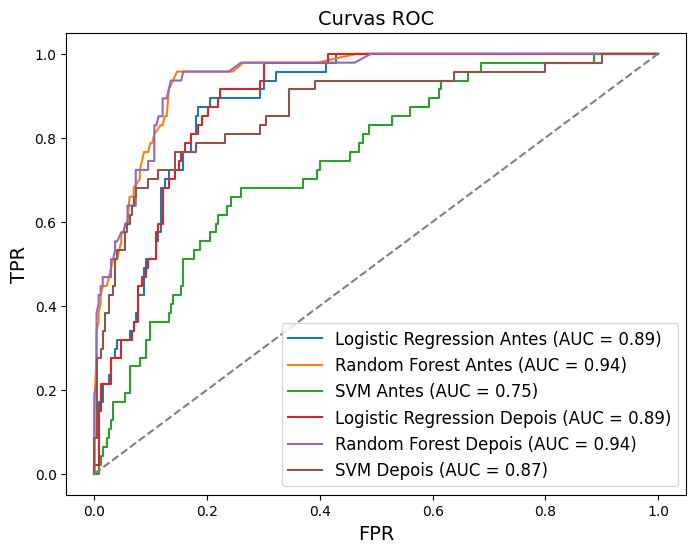

In [ ]:
# Calcular a AUC para os três modelos
y_wine_prob_log_reg_best = best_log_reg_r.predict_proba(X_wine_test)[:,1]
y_wine_prob_rf_best = best_rf_r.predict_proba(X_wine_test)[:,1]
y_wine_prob_svm_best = best_svm_r.predict_proba(X_wine_test)[:,1]
# Curva ROC
fpr_log_reg_rb, tpr_log_reg_rb, _ = roc_curve(y_wine_test, y_wine_prob_log_reg_best)
fpr_rf_rb, tpr_rf_rb, _ = roc_curve(y_wine_test, y_wine_prob_rf_best)
fpr_svm_rb, tpr_svm_rb, _ = roc_curve(y_wine_test, y_wine_prob_svm_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_r, tpr_log_reg_r, label='Logistic Regression Antes (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_log_reg)))
plt.plot(fpr_rf_r, tpr_rf_r, label='Random Forest Antes (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_rf)))
plt.plot(fpr_svm_r, tpr_svm_r, label='SVM Antes (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_svm)))
plt.plot(fpr_log_reg_rb, tpr_log_reg_rb, label='Logistic Regression Depois (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_log_reg_best)))
plt.plot(fpr_rf_rb, tpr_rf_rb, label='Random Forest Depois (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_rf_best)))
plt.plot(fpr_svm_rb, tpr_svm_rb, label='SVM Depois (AUC = {:.2f})'.format(roc_auc_score(y_wine_test, y_wine_prob_svm_best)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()

# Apresentação dos Resultados

De acordo com esses resultados, o Random Forest parece ser o que está se saindo melhor na questão de previsão de dados.

Isso pode se dar por conta da capacidade do Randomforest de capturar relações não lineares. Já que os dados possuem interações complexas e não lineares entre as variáveis, e o Random Forest tende a se sair melhor do que modelos como Regressão Logística (que é linear por natureza) ou SVM, dependendo do kernel.


 Random Forest também lida bem com dados que apresentam multicolinearidade, como é o caso do dataset, enquanto a Regressão Logística pode ser afetada negativamente por ela.


Portanto, o Random Forest pode ter superado os outros modelos devido à sua robustez, capacidade de capturar padrões complexos e menor suscetibilidade ao overfitting, especialmente em conjuntos de dados mais desafiadores, como aqueles com não linearidade e multicolinearidade.


In [ ]:
# Importância das variáveis no modelo Random Forest
feature_importances = best_rf_r.feature_importances_
features = X_wine.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


                 Feature  Importance
10               alcohol    0.155777
7                density    0.118588
1       volatile acidity    0.087320
4              chlorides    0.085290
3         residual sugar    0.083517
6   total sulfur dioxide    0.082852
9              sulphates    0.082122
8                     pH    0.081341
5    free sulfur dioxide    0.077477
2            citric acid    0.073641
0          fixed acidity    0.068160
12                 WHITE    0.002029
11                   RED    0.001884


Como podemos ver acima, as variáveis físico-químicas mais influenciaram na predição da qualidade são, em ordem: Alcohol(álcool), density(densidade), volatile acidity(acidez volátil) e chlorides(cloretos).

#  Limitações do Modelo e Possíveis Melhorias

Possíveis Melhorias no Pipeline:


Apesar de já haver sido utilizado o ajuste de Hiperparâmetros para otimizar os parâmetros dos modelos, ainda era possível expandir o escopo de busca de forma a explorar uma gama maior de parâmetros para talvez encontrar um parâmetro ou uma combinação que se encaixasse ainda mais na situação, provavelmente demandaria mais tempo de processamento, mas poderia chegar em um resultado ainda mais preciso, mesmo que por pouco.


Talvez fosse interessante usar uma divisão diferente de dados, testar menos ou mais dados de teste, menos ou mais dados de validação, realizando uma divisão mais robusta dos dados.


E por fim, poderia ser vantajoso usar uma abordagem de stacking, combinando diferentes modelos de machine learning para melhorar ainda mais o desempenho do modelo, montando um modelo final mais robusto.


Limitações do modelo:


O random forest é um modelo grande e pesado, as vezes pode demandar mais tempo, memória e poder da máquina, podendo tornar treinamentos e previsões bem mais lentos do que deveriam ser.


Além disso, também tem uma tendência a overfitting quando o conjunto de dados é menor, por isso mesmo os conjuntos de vinho branco e vinho vermelho foram somados para formar um único dataframe, tentando prevenir que esse overfitting pudesse ocorrer.
